In [2]:
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd
from sklearn.cluster import KMeans
# Output of plotting commands is displayed inline within the Jupyter notebook.
import seaborn as sns

# # Set a seed so that the results are consistent.
# np.random.seed(3) 

In [10]:
df = pd.read_csv('scraped_data_only_gianha_2.csv',encoding='utf-8')
df.rename(columns={'Diện tích':'area', 
                   'Mức giá' : 'price',
                   'Số phòng ngủ': 'num_of_bedrooms',
                   'Số toilet': 'num_of_toilets',
                   'Pháp lý': 'legal_status',
                   'Nội thất': 'furniture',
                   'Latitude':'latitude',
                   'Longitude':'longitude',
                   'Mặt tiền': 'facade_width',
                   'Đường vào': 'access_road_width',
                   'Hướng nhà': 'house_direction', 
                   'Hướng ban công': 'balcony_direction', 
                   'Số tầng': 'num_of_stories'},
                   inplace=True)
df

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets,latitude,longitude,facade_width,access_road_width,house_direction,balcony_direction,legal_status,furniture
0,46 m²,8 tỷ,4 tầng,4 phòng,4 phòng,16.060087,108.213548,NaN,NaN,NaN,NaN,NaN,NaN
1,47 m²,"3,15 tỷ",3 tầng,3 phòng,2 phòng,16.059497,108.185897,5 m,"2,5 m",Đông - Bắc,NaN,Sổ đỏ/ Sổ hồng,Cơ bản
2,490 m²,Thỏa thuận,2 tầng,2 phòng,2 phòng,15.992632,108.269371,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,Cơ bản
3,552 m²,24 tỷ,2 tầng,4 phòng,NaN,16.017023,108.260246,NaN,NaN,Đông - Nam,Tây,NaN,NaN
4,5.000 m²,Thỏa thuận,NaN,NaN,NaN,15.960981,108.289269,180 m,33 m,Đông - Bắc,NaN,Đang chờ sổ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,484 m²,50 triệu/m²,2 tầng,2 phòng,2 phòng,15.992632,108.269371,NaN,NaN,NaN,NaN,Hợp đồng mua bán,Đầy đủ
2759,514 m²,"24,2 tỷ",2 tầng,2 phòng,2 phòng,15.992632,108.269371,NaN,NaN,Bắc,Nam,Hợp đồng mua bán,Đầy đủ
2760,502 m²,"32,43 tỷ",2 tầng,3 phòng,4 phòng,15.992632,108.269371,NaN,NaN,NaN,NaN,Hợp đồng mua bán,Cơ bản
2761,484 m²,"24,2 tỷ",2 tầng,2 phòng,2 phòng,15.992632,108.269371,NaN,NaN,NaN,NaN,Hợp đồng mua bán,Đầy đủ


In [11]:
columns_to_drop = ['legal_status', 'furniture', 'facade_width', 'access_road_width', 'house_direction', 'balcony_direction']

In [12]:
df = df.drop(columns=columns_to_drop)
df

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets,latitude,longitude
0,46 m²,8 tỷ,4 tầng,4 phòng,4 phòng,16.060087,108.213548
1,47 m²,"3,15 tỷ",3 tầng,3 phòng,2 phòng,16.059497,108.185897
2,490 m²,Thỏa thuận,2 tầng,2 phòng,2 phòng,15.992632,108.269371
3,552 m²,24 tỷ,2 tầng,4 phòng,NaN,16.017023,108.260246
4,5.000 m²,Thỏa thuận,NaN,NaN,NaN,15.960981,108.289269
...,...,...,...,...,...,...,...
2758,484 m²,50 triệu/m²,2 tầng,2 phòng,2 phòng,15.992632,108.269371
2759,514 m²,"24,2 tỷ",2 tầng,2 phòng,2 phòng,15.992632,108.269371
2760,502 m²,"32,43 tỷ",2 tầng,3 phòng,4 phòng,15.992632,108.269371
2761,484 m²,"24,2 tỷ",2 tầng,2 phòng,2 phòng,15.992632,108.269371


In [13]:
def clean_and_calculate_price(row):
    price = row['price']
    area = row['area']
    
    # Skip rows where price or area is None or empty
    if not price or not area:
        return None
    
    # Process the price value
    price = price.lower()
    
    # Handle 'thỏa thuận'
    if 'thỏa thuận' in price:
        return None
    
    # Handle 'triệu/m²' by calculating total price based on area
    if 'triệu/m²' in price:
        try:
            price_per_m2 = float(price.replace('triệu/m²', '').strip().replace(',', '.'))
            area_value = float(area.replace('m²', '').strip().replace(',', '.'))
            total_price = (price_per_m2 * area_value) / 1000  # Convert to 'tỷ'
            return total_price
        except ValueError:
            return None
    
    # Convert 'triệu' to 'tỷ' and handle normal 'tỷ' values
    try:
        if 'triệu' in price:
            return float(price.replace('triệu', '').replace(',', '.').strip()) / 1000
        elif 'tỷ' in price:
            return float(price.replace('tỷ', '').replace(',', '.').strip())
        else:
            return None
    except ValueError:
        return None

In [14]:
df['price'] = df.apply(clean_and_calculate_price, axis=1)
df.head(10)

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets,latitude,longitude
0,46 m²,8.00,4 tầng,4 phòng,4 phòng,16.060087,108.213548
1,47 m²,3.15,3 tầng,3 phòng,2 phòng,16.059497,108.185897
2,490 m²,NaN,2 tầng,2 phòng,2 phòng,15.992632,108.269371
3,552 m²,24.00,2 tầng,4 phòng,NaN,16.017023,108.260246
4,5.000 m²,NaN,NaN,NaN,NaN,15.960981,108.289269
5,600 m²,360.00,19 tầng,NaN,NaN,16.057572,108.246476
6,180 m²,41.00,NaN,30 phòng,30 phòng,16.051608,108.245679
7,108 m²,18.50,NaN,NaN,NaN,16.088383,108.228889
8,115 m²,7.00,7 tầng,6 phòng,7 phòng,16.050781,108.232903
9,"67,8 m²",5.70,NaN,2 phòng,NaN,16.088383,108.228889


In [16]:

def clean_area(area):
    if isinstance(area,str):
        return float(area.lower().replace('m²','').replace('.','').replace(',','.').strip())
    return area

def clean_rooms(value):
    if isinstance(value,str):
        return float(value.lower().replace('phòng','').strip())
    return value

def clean_stories(value):
    if isinstance(value,str):
        return float(value.lower().replace('tầng','').strip())
    return value

In [17]:
df['area'] = df['area'].apply(clean_area)
df.head(10)


,area,price,num_of_stories,num_of_bedrooms,num_of_toilets,latitude,longitude
0,46.0,8.00,4 tầng,4 phòng,4 phòng,16.060087,108.213548
1,47.0,3.15,3 tầng,3 phòng,2 phòng,16.059497,108.185897
2,490.0,NaN,2 tầng,2 phòng,2 phòng,15.992632,108.269371
3,552.0,24.00,2 tầng,4 phòng,NaN,16.017023,108.260246
4,5000.0,NaN,NaN,NaN,NaN,15.960981,108.289269
5,600.0,360.00,19 tầng,NaN,NaN,16.057572,108.246476
6,180.0,41.00,NaN,30 phòng,30 phòng,16.051608,108.245679
7,108.0,18.50,NaN,NaN,NaN,16.088383,108.228889
8,115.0,7.00,7 tầng,6 phòng,7 phòng,16.050781,108.232903
9,67.8,5.70,NaN,2 phòng,NaN,16.088383,108.228889


In [18]:
df['num_of_bedrooms'] = df['num_of_bedrooms'].apply(clean_rooms)
df['num_of_toilets'] = df['num_of_toilets'].apply(clean_rooms)
df['num_of_stories'] = df['num_of_stories'].apply(clean_stories)

df.head(10)

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets,latitude,longitude
0,46.0,8.00,4.0,4.0,4.0,16.060087,108.213548
1,47.0,3.15,3.0,3.0,2.0,16.059497,108.185897
2,490.0,NaN,2.0,2.0,2.0,15.992632,108.269371
3,552.0,24.00,2.0,4.0,NaN,16.017023,108.260246
4,5000.0,NaN,NaN,NaN,NaN,15.960981,108.289269
5,600.0,360.00,19.0,NaN,NaN,16.057572,108.246476
6,180.0,41.00,NaN,30.0,30.0,16.051608,108.245679
7,108.0,18.50,NaN,NaN,NaN,16.088383,108.228889
8,115.0,7.00,7.0,6.0,7.0,16.050781,108.232903
9,67.8,5.70,NaN,2.0,NaN,16.088383,108.228889


In [19]:
df.count()

area               2763
price              2453
num_of_stories     2360
num_of_bedrooms    2245
num_of_toilets     2102
latitude           2733
longitude          2733
dtype: int64

In [43]:
df2 = df[['area','price']]
df2 = df2.dropna()
df2.head(10)

,area,price
0,46.0,8.00
1,47.0,3.15
3,552.0,24.00
5,600.0,360.00
6,180.0,41.00
7,108.0,18.50
8,115.0,7.00
9,67.8,5.70
10,100.0,3.30
12,100.0,4.50


In [49]:
# Calculate the Interquartile Range (IQR) for 'price' and 'area'
Q1_price = df2['price'].quantile(0.25)
Q3_price = df2['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_area = df2['area'].quantile(0.25)
Q3_area = df2['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

# Define the lower and upper bounds for 'price' and 'area'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# Remove outliers from the dataset
df_no_outliers = df2[
    (df2['price'] >= lower_bound_price) & (df2['price'] <= upper_bound_price) &
    (df2['area'] >= lower_bound_area) & (df2['area'] <= upper_bound_area)
]

# Display the updated dataframe after removing outliers
df_no_outliers

,area,price
0,46.0,8.00
1,47.0,3.15
7,108.0,18.50
8,115.0,7.00
9,67.8,5.70
...,...,...
2745,108.0,16.20
2750,43.0,3.70
2751,50.0,3.25
2752,85.0,5.95


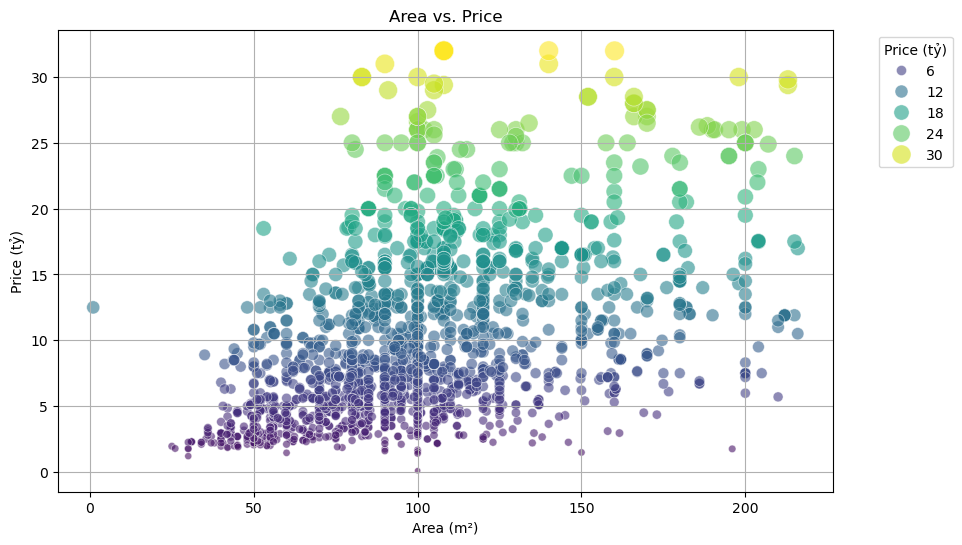

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df_no_outliers, alpha=0.6, size='price', sizes=(20, 200), hue='price', palette='viridis')
plt.title('Area vs. Price')
plt.xlabel('Area (m²)')
plt.ylabel('Price (tỷ)')
plt.grid(True)
plt.legend(title='Price (tỷ)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()